# K-means 範例

- 範例目標：讓同學了解如何使用 sklearn 執行 k-means
- 範例重點：設定 模型估計參數 以及 資料建模 兩大區塊

(Optional) 若尚未安裝相關套件，執行下一行，然後 restart kernel

In [1]:
!pip3 install --user sklearn
!pip3 install --user --upgrade matplotlib

'pip3' 不是內部或外部命令、可執行的程式或批次檔。
'pip3' 不是內部或外部命令、可執行的程式或批次檔。


載入套件

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

載入 toy example 資料集

In [8]:
toy = datasets.make_blobs(centers=3, n_features=4)
X = toy[0]
y = toy[1]

In [12]:
X

array([[ 3.12781725e+00,  8.11998176e+00,  3.05193064e+00,
        -4.90018836e+00],
       [-6.53101127e+00, -8.70563306e+00, -6.85882635e+00,
         9.23131275e+00],
       [ 3.34396416e+00,  2.92280476e+00, -1.89817870e+00,
        -6.29102428e-01],
       [ 3.88204102e+00,  7.30957332e+00,  4.48425982e+00,
        -6.30677725e+00],
       [ 5.24966467e+00,  6.91245465e-01,  2.13469682e-02,
         3.69471176e-01],
       [ 6.28573755e+00,  2.77296397e+00, -2.04191220e+00,
        -1.76124190e+00],
       [-6.35642836e+00, -5.49829383e+00, -7.69653584e+00,
         7.76165774e+00],
       [-7.32068662e+00, -7.27310885e+00, -7.10049956e+00,
         8.64536485e+00],
       [-8.41437777e+00, -9.60494686e+00, -7.61811323e+00,
         8.55627272e+00],
       [ 4.03157817e+00,  3.29308010e+00, -1.95786319e+00,
         2.39609062e-01],
       [ 5.74382415e+00,  3.14605240e+00,  6.77261497e-01,
        -2.05193128e+00],
       [ 3.54760386e+00,  7.40075482e+00,  1.84173518e+00,
      

設定 模型 估計參數

In [9]:
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

資料建模 並 視覺化 結果

[5 1 0 6 3 7 4 4 4 0 3 5 0 6 5 1 2 2 5 0 0 2 1 0 5 1 0 0 4 7 3 6 6 4 2 5 1
 2 6 4 6 0 1 3 1 3 6 4 6 4 7 5 0 6 4 5 3 4 4 1 0 3 2 7 7 2 6 1 3 1 4 3 1 1
 0 6 0 4 3 3 6 1 1 1 6 3 5 5 7 7 4 1 2 1 5 7 7 5 1 4]
[2 1 0 2 0 0 1 1 1 0 0 2 0 2 2 1 2 2 2 0 0 2 1 0 2 1 0 0 1 0 0 2 2 1 2 2 1
 2 2 1 2 0 1 0 1 0 2 1 2 1 0 2 0 2 1 2 0 1 1 1 0 0 2 0 0 2 2 1 0 1 1 0 1 1
 0 2 0 1 0 0 2 1 1 1 2 0 2 2 0 0 1 1 2 1 2 0 0 2 1 1]
[1 2 0 1 0 0 2 2 2 0 0 1 0 1 1 2 1 1 1 0 0 1 2 0 1 2 0 0 2 0 0 1 1 2 1 1 2
 1 1 2 1 0 2 0 2 0 1 2 1 2 0 1 0 1 2 1 0 2 2 2 0 0 1 0 0 1 1 2 0 2 2 0 2 2
 0 1 0 2 0 0 1 2 2 2 1 0 1 1 0 0 2 2 1 2 1 0 0 1 2 2]


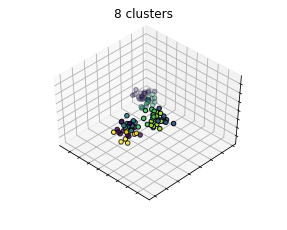

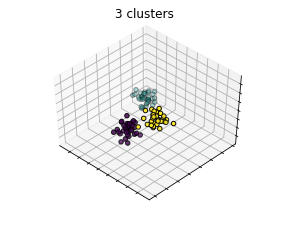

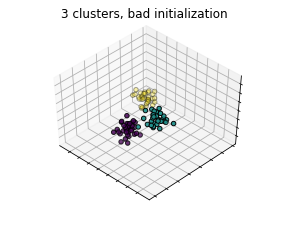

In [13]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_
    print(labels)
    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

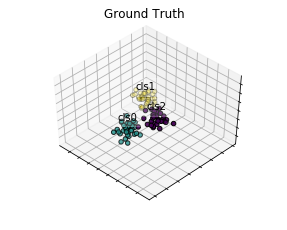

In [11]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()